In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
plt.style.use(['ggplot'])

\begin{equation} \hat{y}= \beta_0 + \beta_1x_1 + \beta_1x_1 ... + \beta_nx_n\end{equation}

\begin{equation} \hat{y} = h_\beta(x) = \beta^T \cdot x\end{equation} 

\begin{equation} \hat{\beta} = (X^T \cdot X)^-1 \cdot X^T \cdot y \end{equation} 
<h5> Generate some data with: 
\begin{equation} \beta_0= 5 \end{equation} 
\begin{equation} \beta_1= 4 \end{equation} 
    
Add some Gaussian noise to the data

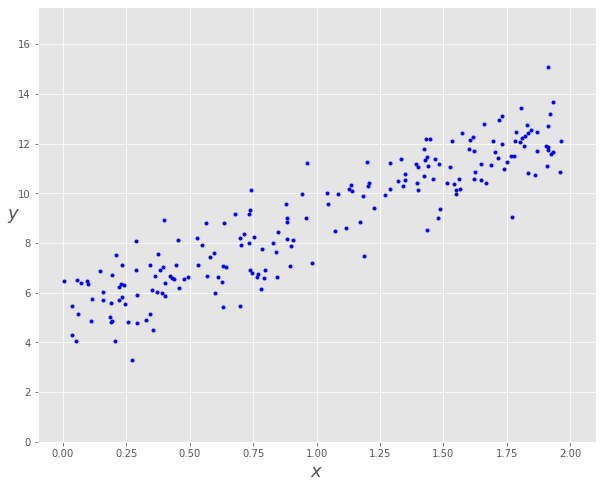

In [2]:
X = 2 * np.random.rand(200,1)
y = 5 +4 * X+np.random.randn(200,1)

plt.figure(figsize=(10,8))
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([-.1,2.1,0,17.5])

In [3]:
X_b = np.c_[np.ones((200,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[5.0557854 ]
 [3.84740802]]


In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 5.0557854 ],
       [12.75060144]])

(-0.1, 2.1, 0.0, 17.5)

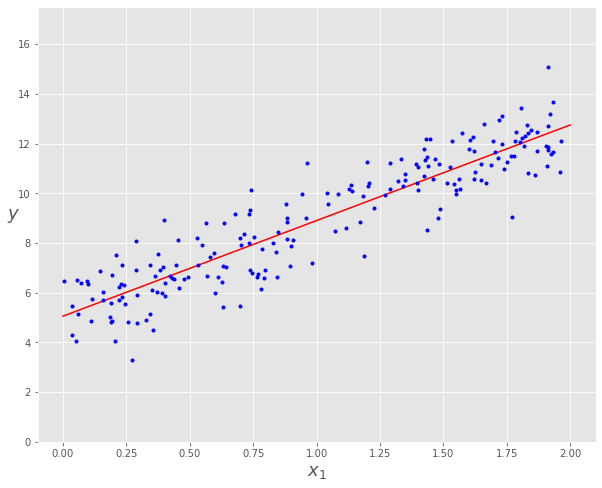

In [5]:
plt.figure(figsize=(10,8))
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-.1,2.1,0,17.5])

<b>Linear Regression</b>
\begin{equation} \hat{y}= \beta_0 + \beta_1x_1 + \beta_1x_1 ... + \beta_nx_n\end{equation}

\begin{equation} \hat{y} = h_\beta(x) = x \cdot \beta^T \end{equation} 



<b>Cost Fuction</b>
\begin{equation}
J(\beta) = {\frac{1}{2n}} \sum_{i=1}^{n} (\hat{y} - y_i)^2 
\end{equation}

In [32]:
def  cal_cost(beta,X,y):
    
    n = len(y)
    y_hat = X.dot(beta)
    cost = (1/2*n) * np.sum(np.square(y_hat-y))
    
    return cost



<b>Objective</b>

\begin{equation} \underset{\beta_0 \beta_1}{\text{min}} J(\beta)\end{equation}


<b>Gradient Desecent</b>


\begin{equation}\beta_n = \beta_n - \alpha \frac{\partial}{\partial\beta_n} J(\beta):= \beta_n -\frac{\alpha}{m}\sum_{i=1}^{m}[(\hat{y} - y_i)x_i] \end{equation}


In [18]:
def gradient_descent(X,y,beta,learning_rate=0.01,iterations=100):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    beta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,beta)
        
        beta = beta -(1/m)*learning_rate*(X.T.dot((prediction - y)))
        beta_history[it,:] =beta.T
        cost_history[it]  = cal_cost(beta,X,y)
        
    return beta, cost_history, beta_history

In [20]:
lr =0.01
n_iter = 1000

beta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
beta,cost_history,beta_history = gradient_descent(X_b,y,beta,lr,n_iter)


print('Beta0:          {:0.3f},\nBeta1:          {:0.3f}'.format(beta[0][0],beta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Beta0:          5.042,
Beta1:          3.859
Final cost/MSE:  20543.495


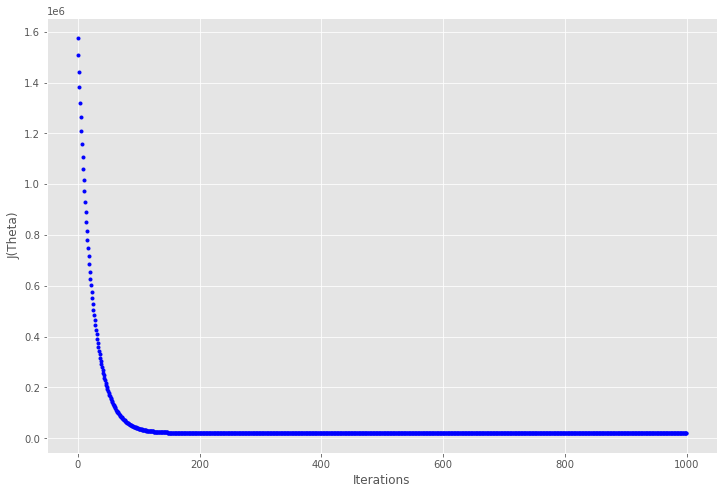

In [21]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

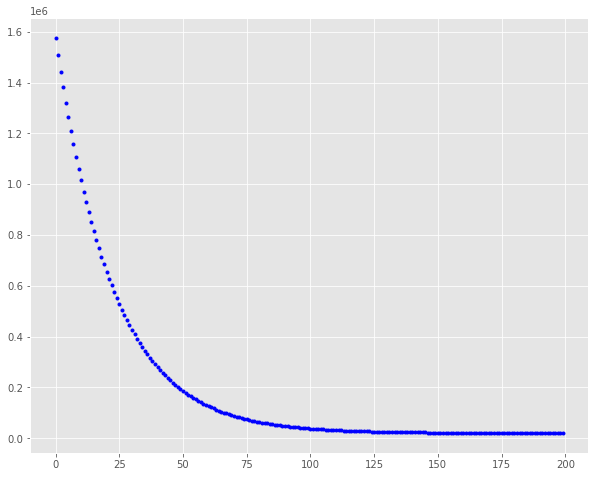

In [22]:
# After around 150 iterations the cost is flat so the remaining iterations are not needed or 
# will not result in any further optimization. Let us zoom in till iteration 200 and see the curve

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

In [23]:
def plot_GD(n_iter,lr,ax,ax1=None):
     
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

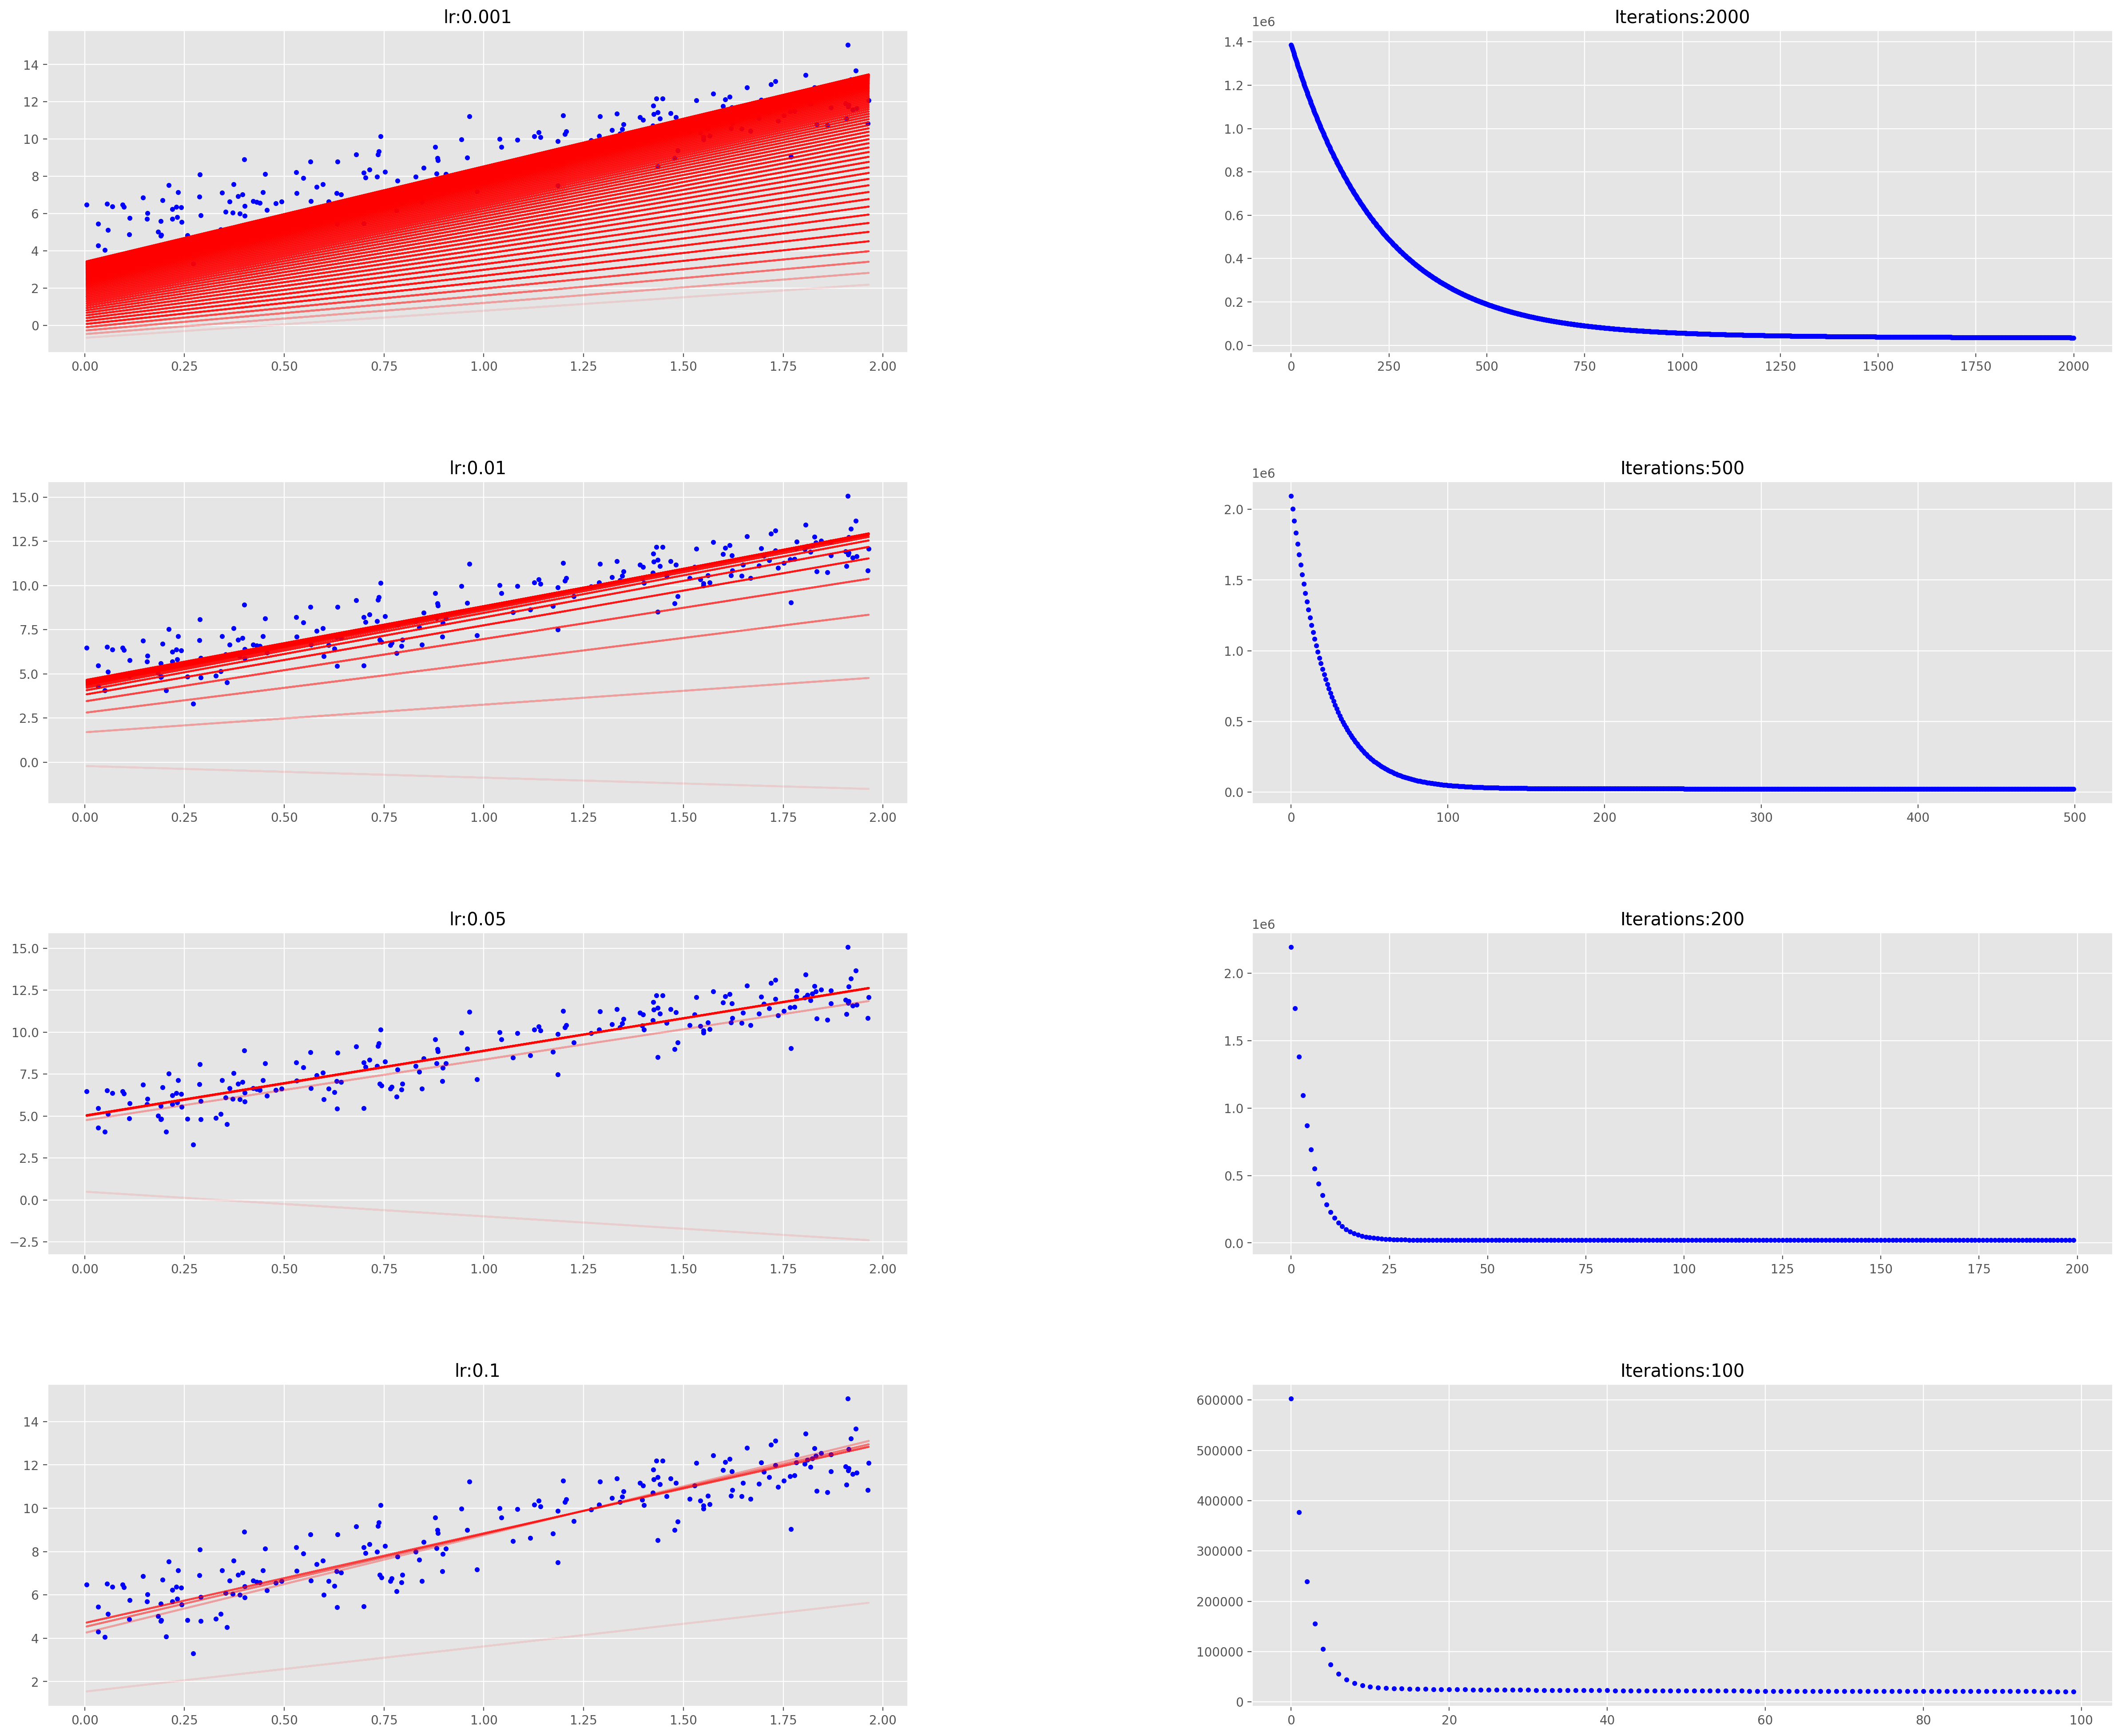

In [24]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

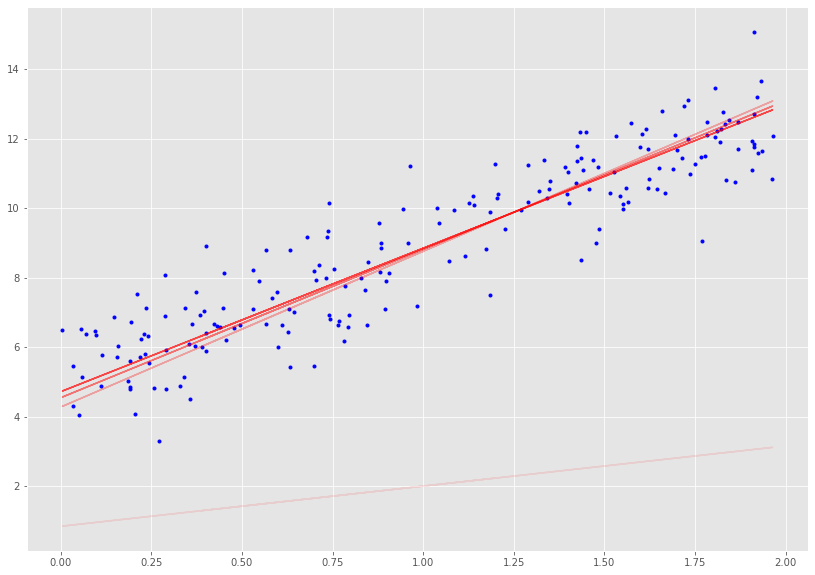

In [25]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

In [26]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
  
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [27]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          5.071,
Theta1:          3.894
Final cost/MSE:  96.768


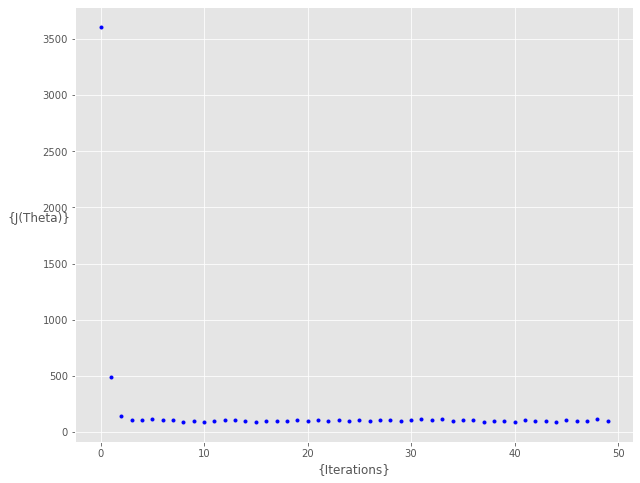

In [28]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

In [29]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [30]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          5.017,
Theta1:          3.880
Final cost/MSE:  2053.234


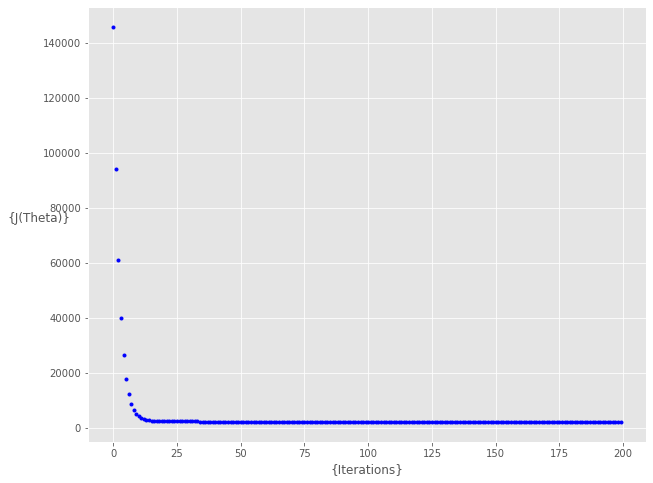

In [31]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')